## Evaluating Sentiment Classifiers

##### Notebook aim:

> The aim of this notebook is to compare and evaluate different approaches to predicting sentiment from a phrase of a football match report 

##### Outcome:

> Produce the best possible model for identifying the sentiment of a phrase in a football match report

##### Methods:


> - The model text has been scraped from articles on the first page of 'The Mirror' match report site
- It has been split into sentences and then split again by commas to produce short phrases
- I will evaluate each method by comparing it to a manually annotated dataset of the same phrases
- The accuracy of each method will be determined by the number of rows that identified the same sentiment as identified in the annotated dataset

-----

### Import the annotated data

#### Create a DataFrame

In [150]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

In [151]:
annotated_df = pd.read_csv('../annotated_data.csv')

In [152]:
import numpy as np

In [153]:
# Replace NaN with empty string
annotated_df = annotated_df.replace(np.nan, '', regex=True)

In [299]:
# Replace sentiment numbers with POSITIVE/NEGATIVE/NEUTRAL
def sentiment_text(number):
    
    if number == 0:
        return "NEGATIVE"
    elif number == 1:
        return "NEUTRAL"
    elif number == 2:
        return "POSITIVE"

In [300]:
annotated_df['sentiment_text'] = annotated_df['Sentiment'].apply(sentiment_text)

### Extract Sentences Column for Sentiment Identification

In [156]:
phrases_df = pd.DataFrame(annotated_df['Sentence'])

In [157]:
phrases_df.head()

,Sentence
0,Kimmich's excellent strike shortly before the break opened up a seven-point lead at the top as Dortmund's young guns failed to trouble their experienced opponents
1,A fine chip from Joshua Kimmich settled the Bundesliga's biggest game since the return of the German top-flight
2,and sent Bayern Munich to within touching distance of an eighth successive league title.
3,Kimmich beat Roman Burki with a superb lofted effort just before half-time at an empty Signal Iduna Park
4,although the home goalkeeper will feel that he should have done better.


-----

### Identifying Sentiment using Different Classifiers

> In the following cells, different combinations of vectorizers and classifiers will be used on the model data to predict the sentiment of the phrases 
- For each of the approaches the optimal C value has already been found

In [158]:
import pickle

#### Define general function to apply predictions to new column 

In [394]:
def predict(model, vectorizer):
    
    # Sentence List
    sentences = []
    
    # Iterate through df and append sentences to sentences list
    for index, row in phrases_df.iterrows():
        
        # Append Sentences list with sentences
        sentences.append(row['Sentence'])
    
    # Iterate through sentences list and make predictions
    predictions = model.predict(vectorizer.transform(sentences))
        
    # Return List of Predictions
    return predictions

## Logistic Regression Classifier

> ### Approach 1 - Count Vectoriser | Ngram 1, 1 | Logistic Regression

##### Import Vectorizer

In [160]:
# Import the vectorizer
cv_1_1_infile_vect = open("cv_1_1.sav",'rb')

In [161]:
# Save instance of vectorizer
cv_1_1_vect = pickle.load(cv_1_1_infile_vect)

In [162]:
# Close file
cv_1_1_infile_vect.close()

##### Import Classifier

In [163]:
# Read in model
logreg_cv_1_1_infile_model = open("logreg_cv_1_1.sav",'rb')

In [164]:
# Save instance of model
logreg_cv_1_1_model = pickle.load(logreg_cv_1_1_infile_model)

In [165]:
# Close file
logreg_cv_1_1_infile_model.close()

#### Predict and add to phrases_df

In [166]:
# Add empty row to phrases_df
phrases_df["logreg_cv_1_1"] = predict(logreg_cv_1_1_model, cv_1_1_vect)

> ### Approach 2 - TFIDF Vectoriser | Ngram 1,1 | Logistic Regression

##### Import Vectorizer

In [167]:
# Import the vectorizer
tfidf_1_1_infile_vect = open("tfidf_1_1.sav",'rb')

In [168]:
# Save instance of vectorizer
tfidf_1_1_vect = pickle.load(tfidf_1_1_infile_vect)

In [169]:
# Close file
cv_1_1_infile_vect.close()

##### Import Classifier

In [170]:
# Read in model
logreg_tfidf_1_1_infile_model = open("logreg_tfidf_1_1.sav",'rb')

In [171]:
# Save instance of model
logreg_tfidf_1_1_model = pickle.load(logreg_tfidf_1_1_infile_model)

In [172]:
# Close file
logreg_tfidf_1_1_infile_model.close()

#### Predict and add to phrases_df

In [173]:
# Add empty row to phrases_df
phrases_df["logreg_tfidf_1_1"] = predict(logreg_tfidf_1_1_model, tfidf_1_1_vect)

> ### Approach 3 - Count Vectoriser | Ngram 1,2 | Logistic Regression

##### Import Vectorizer

In [174]:
# Import the vectorizer
cv_1_2_infile_vect = open("cv_1_2.sav",'rb')

In [175]:
# Save instance of vectorizer
cv_1_2_vect = pickle.load(cv_1_2_infile_vect)

In [176]:
# Close file
cv_1_2_infile_vect.close()

##### Import Classifier

In [177]:
# Read in model
logreg_cv_1_2_infile_model = open("logreg_cv_1_2.sav",'rb')

In [178]:
# Save instance of model
logreg_cv_1_2_model = pickle.load(logreg_cv_1_2_infile_model)

In [179]:
# Close file
logreg_cv_1_2_infile_model.close()

### Predict and add to phrases_df

In [180]:
# Add empty row to phrases_df
phrases_df["logreg_cv_1_2"] = predict(logreg_cv_1_2_model, cv_1_2_vect)

> ### Approach 4 - TfIdf Vectoriser | Ngram 1,2 | Logistic Regression

##### Import Vectorizer

In [181]:
# Import the vectorizer
tfidf_1_2_infile_vect = open("tfidf_1_2.sav",'rb')

In [182]:
# Save instance of vectorizer
tfidf_1_2_vect = pickle.load(tfidf_1_2_infile_vect)

In [183]:
# Close file
tfidf_1_2_infile_vect.close()

##### Import Classifier

In [184]:
# Read in model
logreg_tfidf_1_2_infile_model = open("logreg_tfidf_1_2.sav",'rb')

In [185]:
# Save instance of model
logreg_tfidf_1_2_model = pickle.load(logreg_tfidf_1_2_infile_model)

In [186]:
# Close file
logreg_tfidf_1_2_infile_model.close()

### Predict and add to phrases_df

In [187]:
# Add empty row to phrases_df
phrases_df["logreg_tfidf_1_2"] = predict(logreg_tfidf_1_2_model, tfidf_1_2_vect)

> ### Approach 5 - Count Vectorizer | Ngram 2,2 | Logistic Regression

##### Import Vectorizer

In [188]:
# Import the vectorizer
cv_2_2_infile_vect = open("cv_2_2.sav",'rb')

In [189]:
# Save instance of vectorizer
cv_2_2_vect = pickle.load(cv_2_2_infile_vect)

In [190]:
# Close file
cv_2_2_infile_vect.close()

##### Import Classifier

In [191]:
# Read in model
logreg_cv_2_2_infile_model = open("logreg_cv_2_2.sav",'rb')

In [192]:
# Save instance of model
logreg_cv_2_2_model = pickle.load(logreg_cv_2_2_infile_model)

In [193]:
# Close file
logreg_cv_2_2_infile_model.close()

### Predict and add to phrases_df

In [194]:
# Add row to phrases_df
phrases_df["logreg_cv_2_2"] = predict(logreg_cv_2_2_model, cv_2_2_vect)

> ### Approach 6 - TfIdf Vectorizer | Ngram 2,2 | Logistic Regression

##### Import Vectorizer

In [195]:
# Import the vectorizer
tfidf_2_2_infile_vect = open("tfidf_2_2.sav",'rb')

In [196]:
# Save instance of vectorizer
tfidf_2_2_vect = pickle.load(tfidf_2_2_infile_vect)

In [197]:
# Close file
tfidf_2_2_infile_vect.close()

##### Import Classifier

In [198]:
# Read in model
logreg_tfidf_2_2_infile_model = open("logreg_tfidf_2_2.sav",'rb')

In [199]:
# Save instance of model
logreg_tfidf_2_2_model = pickle.load(logreg_tfidf_2_2_infile_model)

In [200]:
# Close file
logreg_tfidf_2_2_infile_model.close()

### Predict and add to phrases_df

In [201]:
# Add row to phrases_df
phrases_df["logreg_tfidf_2_2"] = predict(logreg_tfidf_2_2_model, tfidf_2_2_vect)

> ### Approach 7 - Count Vectorizer | Ngram 1,3 | Logistic Regression

##### Import Vectorizer

In [202]:
# Import the vectorizer
cv_1_3_infile_vect = open("cv_1_3.sav",'rb')

In [203]:
# Save instance of vectorizer
cv_1_3_vect = pickle.load(cv_1_3_infile_vect)

In [204]:
# Close file
cv_1_3_infile_vect.close()

##### Import Classifier

In [205]:
# Read in model
logreg_cv_1_3_infile_model = open("logreg_cv_1_3.sav",'rb')

In [206]:
# Save instance of model
logreg_cv_1_3_model = pickle.load(logreg_cv_1_3_infile_model)

In [207]:
# Close file
logreg_cv_1_3_infile_model.close()

### Predict and add to phrases_df

In [208]:
# Add row to phrases_df
phrases_df["logreg_cv_1_3"] = predict(logreg_cv_1_3_model, cv_1_3_vect)

> ### Approach 8 - TfIdf Vectorizer | Ngram 1,3 | Logistic Regression

##### Import Vectorizer

In [209]:
# Import the vectorizer
tfidf_1_3_infile_vect = open("tfidf_1_3.sav",'rb')

In [210]:
# Save instance of vectorizer
tfidf_1_3_vect = pickle.load(tfidf_1_3_infile_vect)

In [211]:
# Close file
tfidf_1_3_infile_vect.close()

##### Import Classifier

In [212]:
# Read in model
logreg_tfidf_1_3_infile_model = open("logreg_tfidf_1_3.sav",'rb')

In [213]:
# Save instance of model
logreg_tfidf_1_3_model = pickle.load(logreg_tfidf_1_3_infile_model)

In [214]:
# Close file
logreg_tfidf_1_3_infile_model.close()

### Predict and add to phrases_df

In [215]:
# Add row to phrases_df
phrases_df["logreg_tfidf_1_3"] = predict(logreg_tfidf_1_3_model, tfidf_1_3_vect)

> ### Approach 9 - Count Vectorizer | Ngram 2,3 | Logistic Regression

##### Import Vectorizer

In [216]:
# Import the vectorizer
cv_2_3_infile_vect = open("cv_2_3.sav",'rb')

In [217]:
# Save instance of vectorizer
cv_2_3_vect = pickle.load(cv_2_3_infile_vect)

In [218]:
# Close file
cv_2_3_infile_vect.close()

##### Import Classifier

In [219]:
# Read in model
logreg_cv_2_3_infile_model = open("logreg_cv_2_3.sav",'rb')

In [220]:
# Save instance of model
logreg_cv_2_3_model = pickle.load(logreg_cv_2_3_infile_model)

In [221]:
# Close file
logreg_cv_2_3_infile_model.close()

### Predict and add to phrases_df

In [222]:
# Add row to phrases_df
phrases_df["logreg_cv_2_3"] = predict(logreg_cv_2_3_model, cv_2_3_vect)

> ### Approach 10 - TfIdf Vectorizer | Ngram 2,3 | Logistic Regression

##### Import Vectorizer

In [223]:
# Import the vectorizer
tfidf_2_3_infile_vect = open("tfidf_2_3.sav",'rb')

In [224]:
# Save instance of vectorizer
tfidf_2_3_vect = pickle.load(tfidf_2_3_infile_vect)

In [225]:
# Close file
tfidf_2_3_infile_vect.close()

##### Import Classifier

In [226]:
# Read in model
logreg_tfidf_2_3_infile_model = open("logreg_tfidf_2_3.sav",'rb')

In [227]:
# Save instance of model
logreg_tfidf_2_3_model = pickle.load(logreg_tfidf_2_3_infile_model)

In [228]:
# Close file
logreg_tfidf_2_3_infile_model.close()

### Predict and add to phrases_df

In [229]:
# Add row to phrases_df
phrases_df["logreg_tfidf_2_3"] = predict(logreg_tfidf_2_3_model, tfidf_2_3_vect)

> ### Approach 11 - Count Vectorizer | Ngram 3, 3 | Logistic Regression

##### Import Vectorizer

In [230]:
# Import the vectorizer
cv_3_3_infile_vect = open("cv_3_3.sav",'rb')

In [231]:
# Save instance of vectorizer
cv_3_3_vect = pickle.load(cv_3_3_infile_vect)

In [232]:
# Close file
cv_3_3_infile_vect.close()

##### Import Classifier

In [233]:
# Read in model
logreg_cv_3_3_infile_model = open("logreg_cv_3_3.sav",'rb')

In [234]:
# Save instance of model
logreg_cv_3_3_model = pickle.load(logreg_cv_3_3_infile_model)

In [235]:
# Close file
logreg_cv_3_3_infile_model.close()

### Predict and add to phrases_df

In [236]:
# Add row to phrases_df
phrases_df["logreg_cv_3_3"] = predict(logreg_cv_3_3_model, cv_3_3_vect)

> ### Approach 12 - TfIdf Vectorizer | Ngram 3, 3 | Logistic Regression

##### Import Vectorizer

In [237]:
# Import the vectorizer
tfidf_3_3_infile_vect = open("tfidf_3_3.sav",'rb')

In [238]:
# Save instance of vectorizer
tfidf_3_3_vect = pickle.load(tfidf_3_3_infile_vect)

In [239]:
# Close file
tfidf_3_3_infile_vect.close()

##### Import Classifier

In [240]:
# Read in model
logreg_tfidf_3_3_infile_model = open("logreg_tfidf_3_3.sav",'rb')

In [241]:
# Save instance of model
logreg_tfidf_3_3_model = pickle.load(logreg_tfidf_3_3_infile_model)

In [242]:
# Close file
logreg_tfidf_3_3_infile_model.close()

### Predict and add to phrases_df

In [243]:
# Add row to phrases_df
phrases_df["logreg_tfidf_3_3"] = predict(logreg_tfidf_3_3_model, tfidf_3_3_vect)

----

## LinearSVC Classifier

> _Not neccessary to import new vectorizers_

> ### Approach 13 - Count Vectorizer | Ngram 1,1 | LinearSVC

##### Import Classifier

In [245]:
# Read in model
SVC_cv_1_1_infile_model = open("SVC_cv_1_1.sav",'rb')

In [246]:
# Save instance of model
SVC_cv_1_1_model = pickle.load(SVC_cv_1_1_infile_model)

In [247]:
# Close file
SVC_cv_1_1_infile_model.close()

### Predict and add to phrases_df

In [248]:
# Add row to phrases_df
phrases_df["SVC_cv_1_1"] = predict(SVC_cv_1_1_model, cv_1_1_vect)

> ### Approach 14 - TfIdf Vectorizer | Ngram 1,1 | LinearSVC

##### Import Classifier

In [249]:
# Read in model
SVC_tfidf_1_1_infile_model = open("SVC_tfidf_1_1.sav",'rb')

In [250]:
# Save instance of model
SVC_tfidf_1_1_model = pickle.load(SVC_tfidf_1_1_infile_model)

In [251]:
# Close file
SVC_tfidf_1_1_infile_model.close()

### Predict and add to phrases_df

In [252]:
# Add row to phrases_df
phrases_df["SVC_tfidf_1_1"] = predict(SVC_tfidf_1_1_model, tfidf_1_1_vect)

> ### Approach 15 - Count Vectorizer | Ngram 1, 2 | Linear SVC

##### Import Classifier

In [253]:
# Read in model
SVC_cv_1_2_infile_model = open("SVC_cv_1_2.sav",'rb')

In [254]:
# Save instance of model
SVC_cv_1_2_model = pickle.load(SVC_cv_1_2_infile_model)

In [255]:
# Close file
SVC_cv_1_2_infile_model.close()

### Predict and add to phrases_df

In [256]:
# Add row to phrases_df
phrases_df["SVC_cv_1_2"] = predict(SVC_cv_1_2_model, cv_1_2_vect)

> ### Approach 16 - TfIdf Vectorizer | Ngram 1, 2 | Linear SVC

##### Import Classifier

In [257]:
# Read in model
SVC_tfidf_1_2_infile_model = open("SVC_tfidf_1_2.sav",'rb')

In [258]:
# Save instance of model
SVC_tfidf_1_2_model = pickle.load(SVC_tfidf_1_2_infile_model)

In [259]:
# Close file
SVC_tfidf_1_2_infile_model.close()

### Predict and add to phrases_df

In [260]:
# Add row to phrases_df
phrases_df["SVC_tfidf_1_2"] = predict(SVC_tfidf_1_2_model, tfidf_1_2_vect)

> ### Approach 17 - Count Vectorizer | Ngram 2,2 | LinearSVC

##### Import Classifier

In [261]:
# Read in model
SVC_cv_2_2_infile_model = open("SVC_cv_2_2.sav",'rb')

In [262]:
# Save instance of model
SVC_cv_2_2_model = pickle.load(SVC_cv_2_2_infile_model)

In [263]:
# Close file
SVC_cv_2_2_infile_model.close()

### Predict and add to phrases_df

In [264]:
# Add row to phrases_df
phrases_df["SVC_cv_2_2"] = predict(SVC_cv_2_2_model, cv_2_2_vect)

> ### Approach 18 - TfIdf Vectorizer | Ngram 2, 2 | Linear SVC

##### Import Classifier 

In [265]:
# Read in model
SVC_tfidf_2_2_infile_model = open("SVC_tfidf_2_2.sav",'rb')

In [266]:
# Save instance of model
SVC_tfidf_2_2_model = pickle.load(SVC_tfidf_2_2_infile_model)

In [267]:
# Close file
SVC_tfidf_2_2_infile_model.close()

### Predict and add to phrases_df

In [268]:
# Add row to phrases_df
phrases_df["SVC_tfidf_2_2"] = predict(SVC_tfidf_2_2_model, tfidf_2_2_vect)

> ### Approach 19 - Count Vectorizer | Ngram 1, 3 | Linear SVC

##### Import Classifier 

In [269]:
# Read in model
SVC_cv_1_3_infile_model = open("SVC_cv_1_3.sav",'rb')

In [270]:
# Save instance of model
SVC_cv_1_3_model = pickle.load(SVC_cv_1_3_infile_model)

In [271]:
# Close file
SVC_cv_1_3_infile_model.close()

### Predict and add to phrases_df

In [272]:
# Add row to phrases_df
phrases_df["SVC_cv_1_3"] = predict(SVC_cv_1_3_model, cv_1_3_vect)

> ### Approach 20 - TfIdf Vectorizer | Ngram 1, 3 | Linear SVC

##### Import Classifier

In [273]:
# Read in model
SVC_tfidf_1_3_infile_model = open("SVC_tfidf_1_3.sav",'rb')

In [274]:
# Save instance of model
SVC_tfidf_1_3_model = pickle.load(SVC_tfidf_1_3_infile_model)

In [275]:
# Close file
SVC_tfidf_1_3_infile_model.close()

### Predict and add to phrases_df

In [276]:
# Add row to phrases_df
phrases_df["SVC_tfidf_1_3"] = predict(SVC_tfidf_1_3_model, tfidf_1_3_vect)

> ### Approach 21 - Count Vectorizer | Ngram 2, 3 | Linear SVC

##### Import Classifier

In [277]:
# Read in model
SVC_cv_2_3_infile_model = open("SVC_cv_2_3.sav",'rb')

In [278]:
# Save instance of model
SVC_cv_2_3_model = pickle.load(SVC_cv_2_3_infile_model)

In [279]:
# Close file
SVC_cv_2_3_infile_model.close()

### Predict and add to phrases_df

In [280]:
# Add row to phrases_df
phrases_df["SVC_cv_2_3"] = predict(SVC_cv_2_3_model, cv_2_3_vect)

> ### Approach 22 - TfIdf Vectorizer | Ngram 2, 3 | Linear SVC

##### Import Classifier 

In [281]:
# Read in model
SVC_tfidf_2_3_infile_model = open("SVC_tfidf_2_3.sav",'rb')

In [282]:
# Save instance of model
SVC_tfidf_2_3_model = pickle.load(SVC_tfidf_2_3_infile_model)

In [283]:
# Close file
SVC_tfidf_2_3_infile_model.close()

### Predict and add to phrases_df

In [284]:
# Add row to phrases_df
phrases_df["SVC_tfidf_2_3"] = predict(SVC_tfidf_2_3_model, tfidf_2_3_vect)

> ### Approach 23 - Count Vectorizer | Ngram 3, 3 | Linear SVC

##### Import Classifier

In [285]:
# Read in model
SVC_cv_3_3_infile_model = open("SVC_cv_3_3.sav",'rb')

In [286]:
# Save instance of model
SVC_cv_3_3_model = pickle.load(SVC_cv_3_3_infile_model)

In [287]:
# Close file
SVC_cv_3_3_infile_model.close()

### Predict and add to phrases_df

In [288]:
# Add row to phrases_df
phrases_df["SVC_cv_3_3"] = predict(SVC_cv_3_3_model, cv_3_3_vect)

> ### Approach 24 - TfIdf Vectorizer | Ngram 3, 3 | Linear SVC

##### Import Classifier

In [289]:
# Read in model
SVC_tfidf_3_3_infile_model = open("SVC_tfidf_3_3.sav",'rb')

In [290]:
# Save instance of model
SVC_tfidf_3_3_model = pickle.load(SVC_tfidf_3_3_infile_model)

In [291]:
# Close file
SVC_tfidf_3_3_infile_model.close()

### Predict and add to phrases_df

In [292]:
# Add row to phrases_df
phrases_df["SVC_tfidf_3_3"] = predict(SVC_tfidf_3_3_model, tfidf_3_3_vect)

-----

## Compare Accuracy of Approaches

> ##### Function to calculate accuracy score of approach will:
- Compare common rows between annotated dataset and column in phrases df
- Produce a confusion score for false positives, false negatives, true negatives, true positives

Accuracy Score = `(correct matches / length of dataframe) * 100`

Confusion Matrix = { 
                     - True Positive: Positive or Negative correctly identified,
                     - True Negative: Neutral correctly identified,
                     - False Positive: Positive or Negative identified - Neutral was actual sentiment,
                     - False Negative: Neutral identified - Positive / Negative was actual sentiment
                }

In [452]:
def accuracy(df_column):
    
    # Accuracy counter 
    accuracy_counter = 0
    
    # Confusion score dictionary
    confusion_dictionary = {
        "Approach": df_column,
        "True Positive": 0,
        "True Negative": 0,
        "False Positive": 0,
        "False Negative": 0
    }
    
    # ====================
    # ACCURACY SCORE 
    # ====================
    
    # Iterate through phrases_df & annotated_df
    for index, row in phrases_df.iterrows():
        # Increment Accuracy Score
        if row[df_column] == annotated_df.iloc[index]["sentiment_text"]:
            accuracy_counter += 1        
        else:
            continue
            
    # ====================
    # CONFUSION MATRIX 
    # ====================
    
    # Iterate through phrases_df & annotated_df
    for index, row in phrases_df.iterrows():
        # If true value identified
        if row[df_column] == annotated_df.iloc[index]["sentiment_text"]:
            # Increment True Positive
            if row[df_column] == "POSITIVE" or row[df_column] == "NEGATIVE":
                confusion_dictionary["True Positive"] += 1
            # Increment True Negative
            elif row[df_column] == "NEUTRAL":
                confusion_dictionary["True Negative"] += 1
            # Catch error
            else: 
                print("Error 1: Not all cases identified")
        # If False values identified - NEUTRAL
        elif row[df_column] != annotated_df.iloc[index]["sentiment_text"] and row[df_column] == "NEUTRAL":
            # Increment false negative
            confusion_dictionary["False Negative"] += 1
        # If False values identified - POSITIVE / NEGATIVE
        elif row[df_column] != annotated_df.iloc[index]["sentiment_text"] and annotated_df.iloc[index]["sentiment_text"] == "NEUTRAL":
            # Increment False Positive
            confusion_dictionary["False Positive"] += 1
        else:
            # Wrong Sentiment Identified - Positive identified as negative or vice versa
            # Increment False Positive
            confusion_dictionary["False Positive"] += 1
            
            
    # Calculate Accuracy Score
    accuracy_score = (accuracy_counter / len(phrases_df)) * 100
    
    return round(accuracy_score, 3), confusion_dictionary

## Logistic Regression Tests

> ### Test Accuracy - Approach 1

In [312]:
# Save Variables
accuracy_1, confusion_1 = accuracy("logreg_cv_1_1")

In [313]:
# Print Variables
print("Accuracy Score: ", accuracy_1, confusion_1)

Accuracy Score:  70.741 {'Approach': 'logreg_cv_1_1', 'True Positive': 61, 'True Negative': 292, 'False Positive': 59, 'False Negative': 87}


> ### Test Accuracy - Approach 2

In [314]:
# Save Variables
accuracy_2, confusion_2 = accuracy("logreg_tfidf_1_1")

In [315]:
# Print Variables
print("Accuracy Score: ", accuracy_2, confusion_2)

Accuracy Score:  71.142 {'Approach': 'logreg_tfidf_1_1', 'True Positive': 60, 'True Negative': 295, 'False Positive': 55, 'False Negative': 89}


> ### Test Accuracy - Approach 3

In [316]:
# Save Variables
accuracy_3, confusion_3 = accuracy("logreg_cv_1_2")

In [318]:
# Print Variables
print("Accuracy Score: ", accuracy_3, confusion_3)

Accuracy Score:  71.343 {'Approach': 'logreg_cv_1_2', 'True Positive': 60, 'True Negative': 296, 'False Positive': 50, 'False Negative': 93}


> ### Test Accuracy - Approach 4

In [319]:
# Save Variables
accuracy_4, confusion_4 = accuracy("logreg_tfidf_1_2")

In [320]:
# Print Variables
print("Accuracy Score: ", accuracy_4, confusion_4)

Accuracy Score:  66.333 {'Approach': 'logreg_tfidf_1_2', 'True Positive': 67, 'True Negative': 264, 'False Positive': 83, 'False Negative': 85}


> ### Test Accuracy - Approach 5

In [321]:
# Save Variables
accuracy_5, confusion_5 = accuracy("logreg_cv_2_2")

In [322]:
# Print Variables
print("Accuracy Score: ", accuracy_5, confusion_5)

Accuracy Score:  64.93 {'Approach': 'logreg_cv_2_2', 'True Positive': 47, 'True Negative': 277, 'False Positive': 79, 'False Negative': 96}


> ### Test Accuracy - Approach 6

In [323]:
# Save Variables
accuracy_6, confusion_6 = accuracy("logreg_tfidf_2_2")

In [324]:
# Print Variables
print("Accuracy Score: ", accuracy_6, confusion_6)

Accuracy Score:  62.325 {'Approach': 'logreg_tfidf_2_2', 'True Positive': 52, 'True Negative': 259, 'False Positive': 100, 'False Negative': 88}


> ### Test Accuracy - Approach 7

In [325]:
# Save Variables
accuracy_7, confusion_7 = accuracy("logreg_cv_1_3")

In [326]:
# Print Variables
print("Accuracy Score: ", accuracy_7, confusion_7)

Accuracy Score:  71.944 {'Approach': 'logreg_cv_1_3', 'True Positive': 58, 'True Negative': 301, 'False Positive': 44, 'False Negative': 96}


> ### Test Accuracy - Approach 8

In [327]:
# Save Variables
accuracy_8, confusion_8 = accuracy("logreg_tfidf_1_3")

In [328]:
# Print Variables
print("Accuracy Score: ", accuracy_8, confusion_8)

Accuracy Score:  61.122 {'Approach': 'logreg_tfidf_1_3', 'True Positive': 79, 'True Negative': 226, 'False Positive': 130, 'False Negative': 64}


> ### Test Accuracy - Approach 9

In [329]:
# Save Variables
accuracy_9, confusion_9 = accuracy("logreg_cv_2_3")

In [330]:
# Print Variables
print("Accuracy Score: ", accuracy_9, confusion_9)

Accuracy Score:  65.531 {'Approach': 'logreg_cv_2_3', 'True Positive': 40, 'True Negative': 287, 'False Positive': 68, 'False Negative': 104}


> ### Test Accuracy - Approach 10

In [331]:
# Save Variables
accuracy_10, confusion_10 = accuracy("logreg_tfidf_2_3")

In [332]:
# Print Variables
print("Accuracy Score: ", accuracy_10, confusion_10)

Accuracy Score:  57.916 {'Approach': 'logreg_tfidf_2_3', 'True Positive': 47, 'True Negative': 242, 'False Positive': 125, 'False Negative': 85}


> ### Test Accuracy - Approach 11

In [333]:
# Save Variables
accuracy_11, confusion_11 = accuracy("logreg_cv_3_3")

In [334]:
# Print Variables
print("Accuracy Score: ", accuracy_11, confusion_11)

Accuracy Score:  63.527 {'Approach': 'logreg_cv_3_3', 'True Positive': 19, 'True Negative': 298, 'False Positive': 50, 'False Negative': 132}


> ### Test Accuracy - Approach 12

In [335]:
# Save Variables
accuracy_12, confusion_12 = accuracy("logreg_tfidf_3_3")

In [336]:
# Print Variables
print("Accuracy Score: ", accuracy_12, confusion_12)

Accuracy Score:  56.112 {'Approach': 'logreg_tfidf_3_3', 'True Positive': 33, 'True Negative': 247, 'False Positive': 118, 'False Negative': 101}


## Linear SVC Tests

> ### Test Accuracy - Approach 13 

In [337]:
# Save Variables
accuracy_13, confusion_13 = accuracy("SVC_cv_1_1")

In [338]:
# Print Variables
print("Accuracy Score: ", accuracy_13, confusion_13)

Accuracy Score:  71.142 {'Approach': 'SVC_cv_1_1', 'True Positive': 60, 'True Negative': 295, 'False Positive': 54, 'False Negative': 90}


> ### Test Accuracy - Approach 14

In [339]:
# Save Variables
accuracy_14, confusion_14 = accuracy("SVC_tfidf_1_1")

In [340]:
# Print Variables
print("Accuracy Score: ", accuracy_14, confusion_14)

Accuracy Score:  71.543 {'Approach': 'SVC_tfidf_1_1', 'True Positive': 63, 'True Negative': 294, 'False Positive': 55, 'False Negative': 87}


> ### Test Accuracy - Approach 15

In [341]:
# Save Variables
accuracy_15, confusion_15 = accuracy("SVC_cv_1_2")

In [342]:
# Print Variables
print("Accuracy Score: ", accuracy_15, confusion_15)

Accuracy Score:  71.543 {'Approach': 'SVC_cv_1_2', 'True Positive': 60, 'True Negative': 297, 'False Positive': 49, 'False Negative': 93}


> ### Test Accuracy - Approach 16

In [343]:
# Save Variables
accuracy_16, confusion_16 = accuracy("SVC_tfidf_1_2")

In [345]:
# Print Variables
print("Accuracy Score: ", accuracy_16, confusion_16)

Accuracy Score:  67.735 {'Approach': 'SVC_tfidf_1_2', 'True Positive': 74, 'True Negative': 264, 'False Positive': 82, 'False Negative': 79}


> ### Test Accuracy - Approach 17

In [346]:
# Save Variables
accuracy_17, confusion_17 = accuracy("SVC_cv_2_2")

In [347]:
# Print Variables
print("Accuracy Score: ", accuracy_17, confusion_17)

Accuracy Score:  65.731 {'Approach': 'SVC_cv_2_2', 'True Positive': 46, 'True Negative': 282, 'False Positive': 72, 'False Negative': 99}


> ### Test Accuracy - Approach 18 

In [348]:
# Save Variables
accuracy_18, confusion_18 = accuracy("SVC_tfidf_2_2")

In [349]:
# Print Variables
print("Accuracy Score: ", accuracy_18, confusion_18)

Accuracy Score:  61.523 {'Approach': 'SVC_tfidf_2_2', 'True Positive': 61, 'True Negative': 246, 'False Positive': 119, 'False Negative': 73}


> ### Test Accuracy - Approach 19

In [350]:
# Save Variables
accuracy_19, confusion_19 = accuracy("SVC_cv_1_3")

In [351]:
# Print Variables
print("Accuracy Score: ", accuracy_19, confusion_19)

Accuracy Score:  72.745 {'Approach': 'SVC_cv_1_3', 'True Positive': 60, 'True Negative': 303, 'False Positive': 43, 'False Negative': 93}


> ### Test Accuracy - Approach 20

In [352]:
# Save Variables
accuracy_20, confusion_20 = accuracy("SVC_tfidf_1_3")

In [353]:
# Print Variables
print("Accuracy Score: ", accuracy_20, confusion_20)

Accuracy Score:  62.926 {'Approach': 'SVC_tfidf_1_3', 'True Positive': 90, 'True Negative': 224, 'False Positive': 132, 'False Negative': 53}


> ### Test Accuracy - Approach 21

In [354]:
# Save Variables
accuracy_21, confusion_21 = accuracy("SVC_cv_2_3")

In [355]:
# Print Variables
print("Accuracy Score: ", accuracy_21, confusion_21)

Accuracy Score:  65.331 {'Approach': 'SVC_cv_2_3', 'True Positive': 37, 'True Negative': 289, 'False Positive': 64, 'False Negative': 109}


> ### Test Accuracy - Approach 22

In [356]:
# Save Variables
accuracy_22, confusion_22 = accuracy("SVC_tfidf_2_3")

In [357]:
# Print Variables
print("Accuracy Score: ", accuracy_22, confusion_22)

Accuracy Score:  59.519 {'Approach': 'SVC_tfidf_2_3', 'True Positive': 61, 'True Negative': 236, 'False Positive': 129, 'False Negative': 73}


> ### Test Accuracy - Approach 23

In [358]:
# Save Variables
accuracy_23, confusion_23 = accuracy("SVC_cv_3_3")

In [359]:
# Print Variables
print("Accuracy Score: ", accuracy_23, confusion_23)

Accuracy Score:  62.926 {'Approach': 'SVC_cv_3_3', 'True Positive': 17, 'True Negative': 297, 'False Positive': 50, 'False Negative': 135}


> ### Test Accuracy - Approach 24

In [360]:
# Save Variables
accuracy_24, confusion_24 = accuracy("SVC_tfidf_3_3")

In [361]:
# Print Variables
print("Accuracy Score: ", accuracy_24, confusion_24)

Accuracy Score:  55.912 {'Approach': 'SVC_tfidf_3_3', 'True Positive': 38, 'True Negative': 241, 'False Positive': 123, 'False Negative': 97}


----

## Visualise the Test Results

##### Make a Dataframe from the results 

In [362]:
# Begin with confusion matrixes
results_df = pd.DataFrame([confusion_1, confusion_2, confusion_3, confusion_4, confusion_5, confusion_6, confusion_7, confusion_8, confusion_9, confusion_10, confusion_11, confusion_12, confusion_13, confusion_14, confusion_15, confusion_16, confusion_17, confusion_18, confusion_19, confusion_20, confusion_21, confusion_22, confusion_23, confusion_24])

In [363]:
# Add in Accuracy Scores
results_df["Accuracy"] = [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9, accuracy_10, accuracy_11, accuracy_12, accuracy_13, accuracy_14, accuracy_15, accuracy_16, accuracy_17, accuracy_18, accuracy_19, accuracy_20, accuracy_21, accuracy_22, accuracy_23, accuracy_24]

In [364]:
results_df

,Approach,False Negative,False Positive,True Negative,True Positive,Accuracy
0,logreg_cv_1_1,87,59,292,61,70.741
1,logreg_tfidf_1_1,89,55,295,60,71.142
2,logreg_cv_1_2,93,50,296,60,71.343
3,logreg_tfidf_1_2,85,83,264,67,66.333
4,logreg_cv_2_2,96,79,277,47,64.930
5,logreg_tfidf_2_2,88,100,259,52,62.325
6,logreg_cv_1_3,96,44,301,58,71.944
7,logreg_tfidf_1_3,64,130,226,79,61.122
8,logreg_cv_2_3,104,68,287,40,65.531
9,logreg_tfidf_2_3,85,125,242,47,57.916


### Visualise the Accuracy Scores

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, 'logreg_cv_1_1'),
 Text(0, 0, 'logreg_tfidf_1_1'),
 Text(0, 0, 'logreg_cv_1_2'),
 Text(0, 0, 'logreg_tfidf_1_2'),
 Text(0, 0, 'logreg_cv_2_2'),
 Text(0, 0, 'logreg_tfidf_2_2'),
 Text(0, 0, 'logreg_cv_1_3'),
 Text(0, 0, 'logreg_tfidf_1_3'),
 Text(0, 0, 'logreg_cv_2_3'),
 Text(0, 0, 'logreg_tfidf_2_3'),
 Text(0, 0, 'logreg_cv_3_3'),
 Text(0, 0, 'logreg_tfidf_3_3'),
 Text(0, 0, 'SVC_cv_1_1'),
 Text(0, 0, 'SVC_tfidf_1_1'),
 Text(0, 0, 'SVC_cv_1_2'),
 Text(0, 0, 'SVC_tfidf_1_2'),
 Text(0, 0, 'SVC_cv_2_2'),
 Text(0, 0, 'SVC_tfidf_2_2'),
 Text(0, 0, 'SVC_cv_1_3'),
 Text(0, 0, 'SVC_tfidf_1_3'),
 Text(0, 0, 'SVC_cv_2_3'),
 Text(0, 0, 'SVC_tfidf_2_3'),
 Text(0, 0, 'SVC_cv_3_3'),
 Text(0, 0, 'SVC_tfidf_3_3')]

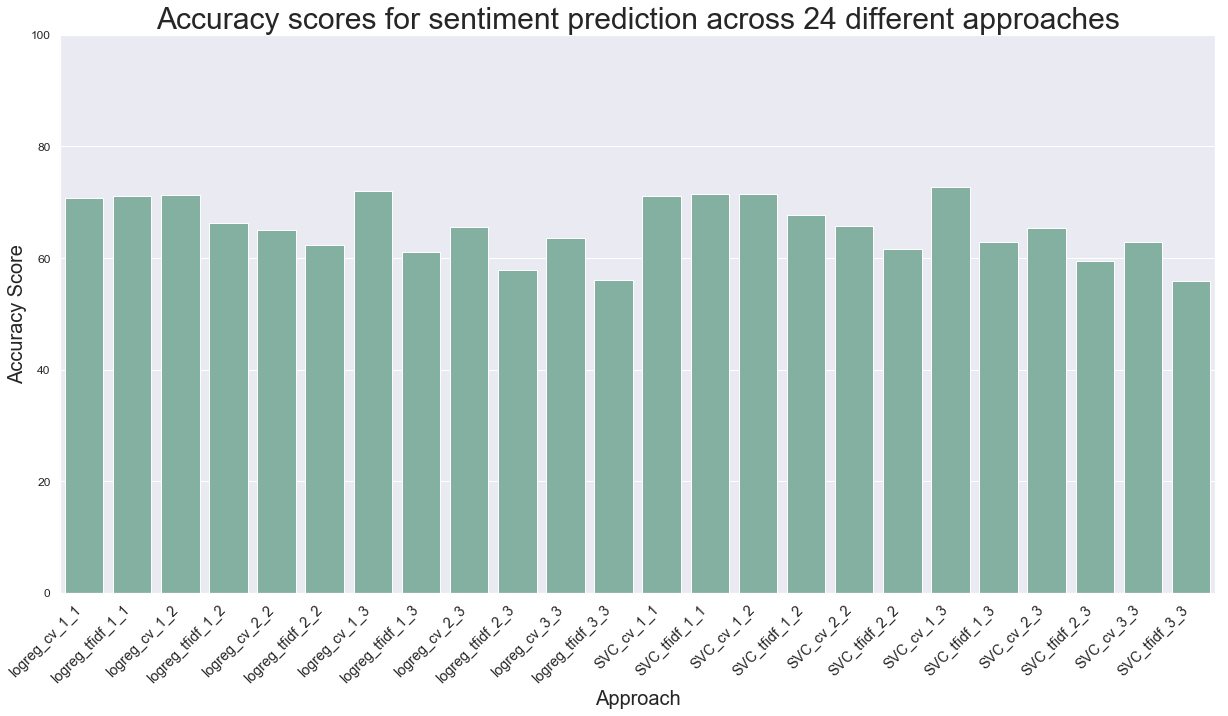

In [374]:
# Set Chart Options
sns.set(rc={'figure.figsize':(20.7,10.27), })
sns.set(style="darkgrid")
accuracy_chart = sns.barplot(x="Approach", y="Accuracy", data=results_df, color="#7CB7A3")
plt.ylim(0, 100)
accuracy_chart.axes.set_title("Accuracy scores for sentiment prediction across 24 different approaches",fontsize=30)
accuracy_chart.set_xlabel("Approach",fontsize=20)
accuracy_chart.set_ylabel("Accuracy Score",fontsize=20)
accuracy_chart.tick_params(labelsize=12)
accuracy_chart.set_xticklabels(accuracy_chart.get_xticklabels(),horizontalalignment='right',
    fontweight='light',
    fontsize='large',  rotation=45)

### Visualising N False Positives


[Text(0, 0, 'logreg_cv_1_1'),
 Text(0, 0, 'logreg_tfidf_1_1'),
 Text(0, 0, 'logreg_cv_1_2'),
 Text(0, 0, 'logreg_tfidf_1_2'),
 Text(0, 0, 'logreg_cv_2_2'),
 Text(0, 0, 'logreg_tfidf_2_2'),
 Text(0, 0, 'logreg_cv_1_3'),
 Text(0, 0, 'logreg_tfidf_1_3'),
 Text(0, 0, 'logreg_cv_2_3'),
 Text(0, 0, 'logreg_tfidf_2_3'),
 Text(0, 0, 'logreg_cv_3_3'),
 Text(0, 0, 'logreg_tfidf_3_3'),
 Text(0, 0, 'SVC_cv_1_1'),
 Text(0, 0, 'SVC_tfidf_1_1'),
 Text(0, 0, 'SVC_cv_1_2'),
 Text(0, 0, 'SVC_tfidf_1_2'),
 Text(0, 0, 'SVC_cv_2_2'),
 Text(0, 0, 'SVC_tfidf_2_2'),
 Text(0, 0, 'SVC_cv_1_3'),
 Text(0, 0, 'SVC_tfidf_1_3'),
 Text(0, 0, 'SVC_cv_2_3'),
 Text(0, 0, 'SVC_tfidf_2_3'),
 Text(0, 0, 'SVC_cv_3_3'),
 Text(0, 0, 'SVC_tfidf_3_3')]

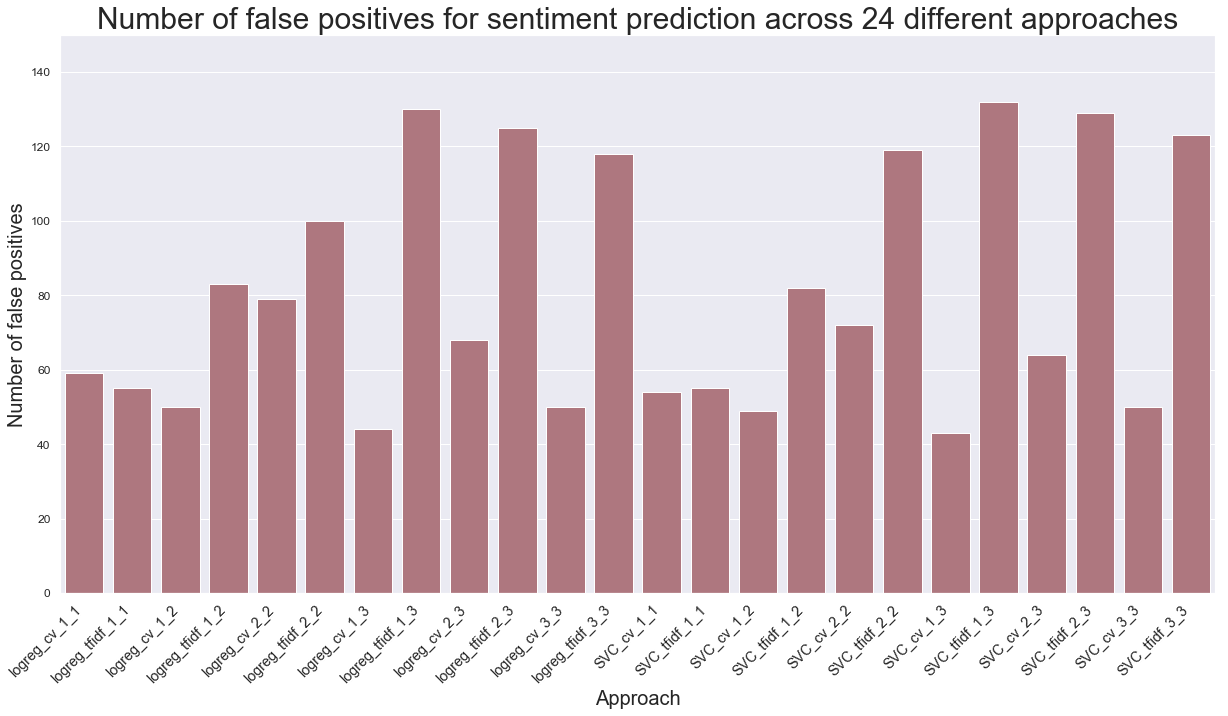

In [379]:
false_positives_chart = sns.barplot(x="Approach", y="False Positive", data=results_df, color="#B76E79")
plt.ylim(0, 150)
false_positives_chart.axes.set_title("Number of false positives for sentiment prediction across 24 different approaches",fontsize=30)
false_positives_chart.set_xlabel("Approach",fontsize=20)
false_positives_chart.set_ylabel("Number of false positives",fontsize=20)
false_positives_chart.tick_params(labelsize=12)
false_positives_chart.set_xticklabels(false_positives_chart.get_xticklabels(),horizontalalignment='right',
    fontweight='light',
    fontsize='large',  rotation=45)

### Visualising Accuracy vs False Positives

<Figure size 9792x14832 with 0 Axes>

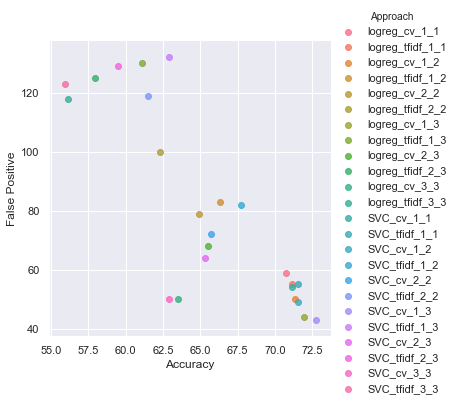

In [383]:
plt.figure(figsize=(136, 206))
accuracy_vs_falsepositives = sns.lmplot( x="Accuracy", y="False Positive", data=results_df, fit_reg=False, hue='Approach', legend=True)
false_positives_chart.axes.set_title("Number of false positives within target identification across 10 different approaches",fontsize=30)
false_positives_chart.set_xlabel("Approach",fontsize=20)
false_positives_chart.set_ylabel("Number of false positives",fontsize=20)
false_positives_chart.tick_params(labelsize=12)

----

# Repeating the process - Lemmatized text / No Stopwords

> #### Predictions for lemmatized / no stopwords
- This next phase will repeat the experiment process after removing stopwords from the text and lemmatizing the phrases

### Make a Separate Dataframe

In [420]:
# LS data frame: Lemmatized - Stopwords
ls_phrases_df = pd.DataFrame(annotated_df['Sentence'])

### Remove Stopwords and Lemmatize

In [421]:
# Import nltk modules
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Import customised list of stopwords
import stopwords

In [422]:
# Function to remove stopwords and lemmatize text - IN PLACE!
def stopwords_lemmatize(string):
    return " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(string) if word not in stopwords.stopwords()])

In [423]:
# Apply the function to a new column - no_stopwords_lemmatizes_phrases
ls_phrases_df['no_stopwords_lemmatizes_phrases'] = ls_phrases_df['Sentence'].apply(stopwords_lemmatize)

In [424]:
# Drop old sentence column
ls_phrases_df = ls_phrases_df.drop(['Sentence'], axis=1)

-----

### Adding Predictions

##### Define a general function to add predictions to a new column of ls_phrases_df

In [425]:
def predict_ls(model, vectorizer):
    
    # Sentence List
    sentences = []
    
    # Iterate through df and append sentences to sentences list
    for index, row in ls_phrases_df.iterrows():
        
        # Append Sentences list with sentences
        sentences.append(row['no_stopwords_lemmatizes_phrases'])
    
    # Iterate through sentences list and make predictions
    predictions = model.predict(vectorizer.transform(sentences))
        
    # Return List of Predictions
    return predictions

> ### Approach 1 - Count Vectorizer | Ngram 1,1 | Logistic Regression

In [426]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_cv_1_1"] = predict_ls(logreg_cv_1_1_model, cv_1_1_vect)

> ### Approach 2 - TfIdf Vectorizer | Ngram 1,1 | Logistic Regression

In [427]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_tfidf_1_1"] = predict_ls(logreg_tfidf_1_1_model, tfidf_1_1_vect)

> ### Approach 3 - Count Vectorizer | Ngram 1,2 | Logistic Regression

In [428]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_cv_1_2"] = predict_ls(logreg_cv_1_2_model, cv_1_2_vect)

> ### Approach 4 - TfIdf Vectorizer | Ngram 1,2 | Logistic Regression

In [429]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_tfidf_1_2"] = predict_ls(logreg_tfidf_1_2_model, tfidf_1_2_vect)

> ### Approach 5 - Count Vectorizer | Ngram 2,2 | Logistic Regression

In [430]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_cv_2_2"] = predict_ls(logreg_cv_2_2_model, cv_2_2_vect)

> ### Approach 6 - TfIdf Vectorizer | Ngram 2,2 | Logistic Regression

In [431]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_tfidf_2_2"] = predict_ls(logreg_tfidf_2_2_model, tfidf_2_2_vect)

> ### Approach 7 - Count Vectorizer | Ngram 1,3 | Logistic Regression

In [432]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_cv_1_3"] = predict_ls(logreg_cv_1_3_model, cv_1_3_vect)

> ### Approach 8 - TfIdf Vectorizer | Ngram 1,3 | Logistic Regression

In [433]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_tfidf_1_3"] = predict_ls(logreg_tfidf_1_3_model, tfidf_1_3_vect)

> ### Approach 9 - Count Vectorizer | Ngram 2,3 | Logistic Regression

In [434]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_cv_2_3"] = predict_ls(logreg_cv_2_3_model, cv_2_3_vect)

> ### Approach 10 - TfIdf Vectorizer | Ngram 2,3 | Logistic Regression

In [435]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_tfidf_2_3"] = predict_ls(logreg_tfidf_2_3_model, tfidf_2_3_vect)

> ### Approach 11 - Count Vectorizer | Ngram 3,3 | Logistic Regression

In [436]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_cv_3_3"] = predict_ls(logreg_cv_3_3_model, cv_3_3_vect)

> ### Approach 12 - TfIdf Vectorizer | Ngram 3,3 | Logistic Regression

In [437]:
# Add row to ls_phrases_df
ls_phrases_df["logreg_tfidf_3_3"] = predict_ls(logreg_tfidf_3_3_model, tfidf_3_3_vect)

### Linear SVC

> ### Approach 13 - Count Vectorizer | Ngram 1,1 | Linear SVC

In [438]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_cv_1_1"] = predict_ls(SVC_cv_1_1_model, cv_1_1_vect)

> ### Approach 14 - TfIdf Vectorizer | Ngram 1,1 | Linear SVC

In [439]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_tfidf_1_1"] = predict_ls(SVC_tfidf_1_1_model, tfidf_1_1_vect)

> ### Approach 15 - Count Vectorizer | Ngram 1,2 | Linear SVC

In [440]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_cv_1_2"] = predict_ls(SVC_cv_1_2_model, cv_1_2_vect)

> ### Approach 16 - TfIdf Vectorizer | Ngram 1,2 | Linear SVC

In [441]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_tfidf_1_2"] = predict_ls(SVC_tfidf_1_2_model, tfidf_1_2_vect)

> ### Approach 17 - Count Vectorizer | Ngram 2,2 | Linear SVC

In [442]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_cv_2_2"] = predict_ls(SVC_cv_2_2_model, cv_2_2_vect)

> ### Approach 18 - TfIdf Vectorizer | Ngram 2,2 | Linear SVC

In [443]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_tfidf_2_2"] = predict_ls(SVC_tfidf_2_2_model, tfidf_2_2_vect)

> ### Approach 19 - Count Vectorizer | Ngram 1,3 | Linear SVC

In [444]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_cv_1_3"] = predict_ls(SVC_cv_1_3_model, cv_1_3_vect)

> ### Approach 20 - TfIdf Vectorizer | Ngram 1,3 | Linear SVC

In [445]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_tfidf_1_3"] = predict_ls(SVC_tfidf_1_3_model, tfidf_1_3_vect)

> ### Approach 21 - Count Vectorizer | Ngram 2,3 | Linear SVC

In [446]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_cv_2_3"] = predict_ls(SVC_cv_2_3_model, cv_2_3_vect)

> ### Approach 22 - TfIdf Vectorizer | Ngram 2,3 | Linear SVC

In [447]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_tfidf_2_3"] = predict_ls(SVC_tfidf_2_3_model, tfidf_2_3_vect)

> ### Approach 23 - Count Vectorizer | Ngram 3,3 | Linear SVC

In [448]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_cv_3_3"] = predict_ls(SVC_cv_3_3_model, cv_3_3_vect)

> ### Approach 24 - TfIdf Vectorizer | Ngram 3,3 | Linear SVC

In [449]:
# Add row to ls_phrases_df
ls_phrases_df["SVC_tfidf_3_3"] = predict_ls(SVC_tfidf_3_3_model, tfidf_3_3_vect)

----

## Test Accuracy - No Stopwords / Lemmatized Text

#### Define Function - Same as above

In [524]:
def accuracy_ls(df_column):
    
    # Accuracy counter 
    accuracy_counter = 0
    
    # Confusion score dictionary
    confusion_dictionary = {
        "Approach": df_column,
        "True Positive": 0,
        "True Negative": 0,
        "False Positive": 0,
        "False Negative": 0
    }
    
    # ====================
    # ACCURACY SCORE 
    # ====================
    
    # Iterate through ls_phrases_df & annotated_df
    for index, row in ls_phrases_df.iterrows():
        # Increment Accuracy Score
        if row[df_column] == annotated_df.iloc[index]["sentiment_text"]:
            accuracy_counter += 1        
        else:
            continue
            
    # ====================
    # CONFUSION MATRIX 
    # ====================
    
    # Iterate through ls_phrases_df & annotated_df
    for index, row in ls_phrases_df.iterrows():
        # If true value identified
        if row[df_column] == annotated_df.iloc[index]["sentiment_text"]:
            # Increment True Positive
            if row[df_column] == "POSITIVE" or row[df_column] == "NEGATIVE":
                confusion_dictionary["True Positive"] += 1
            # Increment True Negative
            elif row[df_column] == "NEUTRAL":
                confusion_dictionary["True Negative"] += 1
            # Catch error
            else: 
                print("Error 1: Not all cases identified")
        # If False values identified - NEUTRAL
        elif row[df_column] != annotated_df.iloc[index]["sentiment_text"] and row[df_column] == "NEUTRAL":
            # Increment false negative
            confusion_dictionary["False Negative"] += 1
        # If False values identified - POSITIVE / NEGATIVE
        elif row[df_column] != annotated_df.iloc[index]["sentiment_text"] and annotated_df.iloc[index]["sentiment_text"] == "NEUTRAL":
            # Increment False Positive
            confusion_dictionary["False Positive"] += 1
            #print("Text: ", row['no_stopwords_lemmatizes_phrases'])
            #print("Actual: ", annotated_df.iloc[index]["sentiment_text"])
            #print("Predict: ", row[df_column])
        else:
            # Wrong Sentiment Identified - Positive identified as negative or vice versa
            # Increment False Positive
            confusion_dictionary["False Positive"] += 1
            #print("Text: ", row['no_stopwords_lemmatizes_phrases'])
            #print("Actual: ", annotated_df.iloc[index]["sentiment_text"])
            #print("Predict: ", row[df_column])
            
            
    # Calculate Accuracy Score
    accuracy_score = (accuracy_counter / len(ls_phrases_df)) * 100
    
    return round(accuracy_score, 3), confusion_dictionary

> ### Test Accuracy - Approach 1 

In [525]:
# Save Variables
ls_accuracy_1, ls_confusion_1 = accuracy_ls("logreg_cv_1_1")

In [456]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_1, ls_confusion_1)

Accuracy Score:  73.146 {'Approach': 'logreg_cv_1_1', 'True Positive': 56, 'True Negative': 309, 'False Positive': 36, 'False Negative': 98}


> ### Test Accuracy - Approach 2

In [457]:
# Save Variables
ls_accuracy_2, ls_confusion_2 = accuracy_ls("logreg_tfidf_1_1")

In [458]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_2, ls_confusion_2)

Accuracy Score:  70.942 {'Approach': 'logreg_tfidf_1_1', 'True Positive': 57, 'True Negative': 297, 'False Positive': 49, 'False Negative': 96}


> ### Test Accuracy - Approach 3

In [459]:
# Save Variables
ls_accuracy_3, ls_confusion_3 = accuracy_ls("logreg_cv_1_2")

In [460]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_3, ls_confusion_3)

Accuracy Score:  70.942 {'Approach': 'logreg_cv_1_2', 'True Positive': 46, 'True Negative': 308, 'False Positive': 37, 'False Negative': 108}


> ### Test Accuracy - Approach 4

In [461]:
# Save Variables
ls_accuracy_4, ls_confusion_4 = accuracy_ls("logreg_tfidf_1_2")

In [462]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_4, ls_confusion_4)

Accuracy Score:  65.531 {'Approach': 'logreg_tfidf_1_2', 'True Positive': 61, 'True Negative': 266, 'False Positive': 80, 'False Negative': 92}


> ### Test Accuracy - Approach 5

In [463]:
# Save Variables
ls_accuracy_5, ls_confusion_5 = accuracy_ls("logreg_cv_2_2")

In [464]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_5, ls_confusion_5)

Accuracy Score:  64.93 {'Approach': 'logreg_cv_2_2', 'True Positive': 31, 'True Negative': 293, 'False Positive': 58, 'False Negative': 117}


> ### Test Accuracy - Approach 6

In [465]:
# Save Variables
ls_accuracy_6, ls_confusion_6 = accuracy_ls("logreg_tfidf_2_2")

In [466]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_6, ls_confusion_6)

Accuracy Score:  61.723 {'Approach': 'logreg_tfidf_2_2', 'True Positive': 45, 'True Negative': 263, 'False Positive': 94, 'False Negative': 97}


> ### Test Accuracy - Approach 7

In [471]:
# Save Variables
ls_accuracy_7, ls_confusion_7 = accuracy_ls("logreg_cv_1_3")

In [472]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_7, ls_confusion_7)

Accuracy Score:  71.343 {'Approach': 'logreg_cv_1_3', 'True Positive': 47, 'True Negative': 309, 'False Positive': 35, 'False Negative': 108}


> ### Test Accuracy - Approach 8

In [469]:
# Save Variables
ls_accuracy_8, ls_confusion_8 = accuracy_ls("logreg_tfidf_1_3")

In [470]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_8, ls_confusion_8)

Accuracy Score:  61.122 {'Approach': 'logreg_tfidf_1_3', 'True Positive': 72, 'True Negative': 233, 'False Positive': 123, 'False Negative': 71}


> ### Test Accuracy - Approach 9 

In [473]:
# Save Variables
ls_accuracy_9, ls_confusion_9 = accuracy_ls("logreg_cv_2_3")

In [474]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_9, ls_confusion_9)

Accuracy Score:  66.333 {'Approach': 'logreg_cv_2_3', 'True Positive': 32, 'True Negative': 299, 'False Positive': 51, 'False Negative': 117}


> ### Test Accuracy - Approach 10

In [475]:
# Save Variables
ls_accuracy_10, ls_confusion_10 = accuracy_ls("logreg_tfidf_2_3")

In [476]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_10, ls_confusion_10)

Accuracy Score:  58.517 {'Approach': 'logreg_tfidf_2_3', 'True Positive': 43, 'True Negative': 249, 'False Positive': 116, 'False Negative': 91}


> ### Test Accuracy - Approach 11

In [477]:
# Save Variables
ls_accuracy_11, ls_confusion_11 = accuracy_ls("logreg_cv_3_3")

In [478]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_11, ls_confusion_11)

Accuracy Score:  66.533 {'Approach': 'logreg_cv_3_3', 'True Positive': 21, 'True Negative': 311, 'False Positive': 34, 'False Negative': 133}


> ### Test Accuracy - Approach 12

In [479]:
# Save Variables
ls_accuracy_12, ls_confusion_12 = accuracy_ls("logreg_tfidf_3_3")

In [481]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_12, ls_confusion_12)

Accuracy Score:  60.721 {'Approach': 'logreg_tfidf_3_3', 'True Positive': 28, 'True Negative': 275, 'False Positive': 78, 'False Negative': 118}


### Linear SVC

> ### Test Accuracy - Approach 13

In [482]:
# Save Variables
ls_accuracy_13, ls_confusion_13 = accuracy_ls("SVC_cv_1_1")

In [483]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_13, ls_confusion_13)

Accuracy Score:  73.146 {'Approach': 'SVC_cv_1_1', 'True Positive': 55, 'True Negative': 310, 'False Positive': 37, 'False Negative': 97}


> ### Test Accuracy - Approach 14

In [484]:
# Save Variables
ls_accuracy_14, ls_confusion_14 = accuracy_ls("SVC_tfidf_1_1")

In [485]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_14, ls_confusion_14)

Accuracy Score:  71.343 {'Approach': 'SVC_tfidf_1_1', 'True Positive': 58, 'True Negative': 298, 'False Positive': 49, 'False Negative': 94}


> ### Test Accuracy - Approach 15

In [486]:
# Save Variables
ls_accuracy_15, ls_confusion_15 = accuracy_ls("SVC_cv_1_2")

In [487]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_15, ls_confusion_15)

Accuracy Score:  71.743 {'Approach': 'SVC_cv_1_2', 'True Positive': 49, 'True Negative': 309, 'False Positive': 37, 'False Negative': 104}


> ### Test Accuracy - Approach 16

In [488]:
# Save Variables
ls_accuracy_16, ls_confusion_16 = accuracy_ls("SVC_tfidf_1_2")

In [489]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_16, ls_confusion_16)

Accuracy Score:  66.733 {'Approach': 'SVC_tfidf_1_2', 'True Positive': 63, 'True Negative': 270, 'False Positive': 78, 'False Negative': 88}


> ### Test Accuracy - Approach 17

In [490]:
# Save Variables
ls_accuracy_17, ls_confusion_17 = accuracy_ls("SVC_cv_2_2")

In [491]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_17, ls_confusion_17)

Accuracy Score:  65.531 {'Approach': 'SVC_cv_2_2', 'True Positive': 31, 'True Negative': 296, 'False Positive': 55, 'False Negative': 117}


> ### Test Accuracy - Approach 18

In [495]:
# Save Variables
ls_accuracy_18, ls_confusion_18 = accuracy_ls("SVC_tfidf_2_2")

In [496]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_18, ls_confusion_18)

Accuracy Score:  61.723 {'Approach': 'SVC_tfidf_2_2', 'True Positive': 52, 'True Negative': 256, 'False Positive': 106, 'False Negative': 85}


> ### Test Accuracy - Approach 19

In [498]:
# Save Variables
ls_accuracy_19, ls_confusion_19 = accuracy_ls("SVC_cv_1_3")

In [499]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_19, ls_confusion_19)

Accuracy Score:  71.743 {'Approach': 'SVC_cv_1_3', 'True Positive': 49, 'True Negative': 309, 'False Positive': 35, 'False Negative': 106}


> ### Test Accuracy - Approach 20

In [500]:
# Save Variables
ls_accuracy_20, ls_confusion_20 = accuracy_ls("SVC_tfidf_1_3")

In [501]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_20, ls_confusion_20)

Accuracy Score:  62.124 {'Approach': 'SVC_tfidf_1_3', 'True Positive': 83, 'True Negative': 227, 'False Positive': 128, 'False Negative': 61}


> ### Test Accuracy - Approach 21

In [502]:
# Save Variables
ls_accuracy_21, ls_confusion_21 = accuracy_ls("SVC_cv_2_3")

In [503]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_21, ls_confusion_21)

Accuracy Score:  67.535 {'Approach': 'SVC_cv_2_3', 'True Positive': 32, 'True Negative': 305, 'False Positive': 44, 'False Negative': 118}


> ### Test Accuracy - Approach 22

In [504]:
# Save Variables
ls_accuracy_22, ls_confusion_22 = accuracy_ls("SVC_tfidf_2_3")

In [505]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_22, ls_confusion_22)

Accuracy Score:  59.519 {'Approach': 'SVC_tfidf_2_3', 'True Positive': 51, 'True Negative': 246, 'False Positive': 117, 'False Negative': 85}


> ### Test Accuracy - Approach 23

In [506]:
# Save Variables
ls_accuracy_23, ls_confusion_23 = accuracy_ls("SVC_cv_3_3")

In [507]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_23, ls_confusion_23)

Accuracy Score:  66.132 {'Approach': 'SVC_cv_3_3', 'True Positive': 21, 'True Negative': 309, 'False Positive': 36, 'False Negative': 133}


> ### Test Accuracy - Approach 24

In [508]:
# Save Variables
ls_accuracy_24, ls_confusion_24 = accuracy_ls("SVC_tfidf_3_3")

In [509]:
# Print Variables
print("Accuracy Score: ", ls_accuracy_24, ls_confusion_24)

Accuracy Score:  60.721 {'Approach': 'SVC_tfidf_3_3', 'True Positive': 31, 'True Negative': 272, 'False Positive': 82, 'False Negative': 114}


----

## Visualising the results

In [510]:
# Begin with confusion matrixes
ls_results_df = pd.DataFrame([ls_confusion_1, ls_confusion_2, ls_confusion_3, ls_confusion_4, ls_confusion_5, ls_confusion_6, ls_confusion_7, ls_confusion_8, ls_confusion_9, ls_confusion_10, ls_confusion_11, ls_confusion_12, ls_confusion_13, ls_confusion_14, ls_confusion_15, ls_confusion_16, ls_confusion_17, ls_confusion_18, ls_confusion_19, ls_confusion_20, ls_confusion_21, ls_confusion_22, ls_confusion_23, ls_confusion_24])

In [512]:
# Adding the accuracy scores
ls_results_df['Accuracy'] = [ls_accuracy_1, ls_accuracy_2, ls_accuracy_3, ls_accuracy_4, ls_accuracy_5, ls_accuracy_6, ls_accuracy_7, ls_accuracy_8, ls_accuracy_9, ls_accuracy_10, ls_accuracy_11, ls_accuracy_12, ls_accuracy_13, ls_accuracy_14, ls_accuracy_15, ls_accuracy_16, ls_accuracy_17, ls_accuracy_18, ls_accuracy_19, ls_accuracy_20, ls_accuracy_21, ls_accuracy_22, ls_accuracy_23, ls_accuracy_24] 

In [513]:
ls_results_df

,Approach,False Negative,False Positive,True Negative,True Positive,Accuracy
0,logreg_cv_1_1,98,36,309,56,73.146
1,logreg_tfidf_1_1,96,49,297,57,70.942
2,logreg_cv_1_2,108,37,308,46,70.942
3,logreg_tfidf_1_2,92,80,266,61,65.531
4,logreg_cv_2_2,117,58,293,31,64.930
5,logreg_tfidf_2_2,97,94,263,45,61.723
6,logreg_cv_1_3,108,35,309,47,71.343
7,logreg_tfidf_1_3,71,123,233,72,61.122
8,logreg_cv_2_3,117,51,299,32,66.333
9,logreg_tfidf_2_3,91,116,249,43,58.517


### Visualising Accuracy Scores

[Text(0, 0, 'logreg_cv_1_1'),
 Text(0, 0, 'logreg_tfidf_1_1'),
 Text(0, 0, 'logreg_cv_1_2'),
 Text(0, 0, 'logreg_tfidf_1_2'),
 Text(0, 0, 'logreg_cv_2_2'),
 Text(0, 0, 'logreg_tfidf_2_2'),
 Text(0, 0, 'logreg_cv_1_3'),
 Text(0, 0, 'logreg_tfidf_1_3'),
 Text(0, 0, 'logreg_cv_2_3'),
 Text(0, 0, 'logreg_tfidf_2_3'),
 Text(0, 0, 'logreg_cv_3_3'),
 Text(0, 0, 'logreg_tfidf_3_3'),
 Text(0, 0, 'SVC_cv_1_1'),
 Text(0, 0, 'SVC_tfidf_1_1'),
 Text(0, 0, 'SVC_cv_1_2'),
 Text(0, 0, 'SVC_tfidf_1_2'),
 Text(0, 0, 'SVC_cv_2_2'),
 Text(0, 0, 'SVC_tfidf_2_2'),
 Text(0, 0, 'SVC_cv_1_3'),
 Text(0, 0, 'SVC_tfidf_1_3'),
 Text(0, 0, 'SVC_cv_2_3'),
 Text(0, 0, 'SVC_tfidf_2_3'),
 Text(0, 0, 'SVC_cv_3_3'),
 Text(0, 0, 'SVC_tfidf_3_3')]

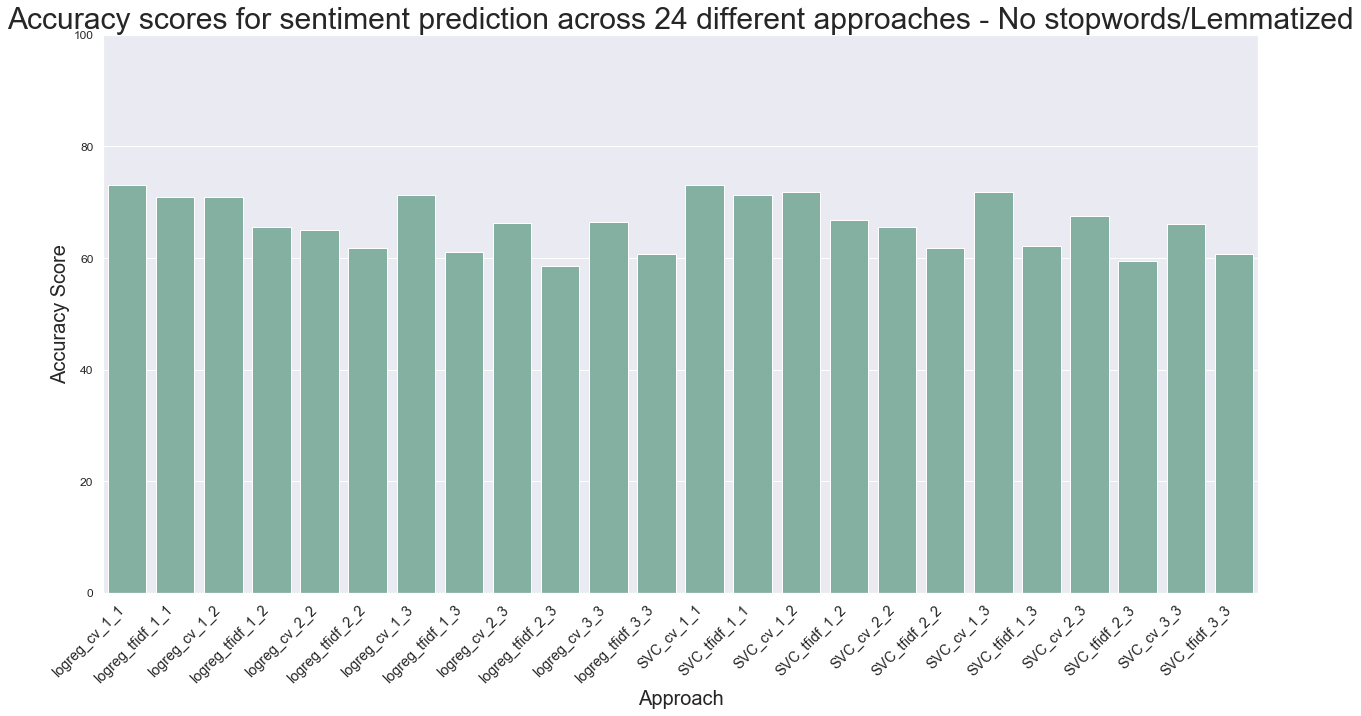

In [515]:
# Set Chart Options
sns.set(rc={'figure.figsize':(20.7,10.27), })
sns.set(style="darkgrid")
accuracy_chart = sns.barplot(x="Approach", y="Accuracy", data=ls_results_df, color="#7CB7A3")
plt.ylim(0, 100)
accuracy_chart.axes.set_title("Accuracy scores for sentiment prediction across 24 different approaches - No stopwords/Lemmatized",fontsize=30)
accuracy_chart.set_xlabel("Approach",fontsize=20)
accuracy_chart.set_ylabel("Accuracy Score",fontsize=20)
accuracy_chart.tick_params(labelsize=12)
accuracy_chart.set_xticklabels(accuracy_chart.get_xticklabels(),horizontalalignment='right',
    fontweight='light',
    fontsize='large',  rotation=45)

### Visualising N False Positives

[Text(0, 0, 'logreg_cv_1_1'),
 Text(0, 0, 'logreg_tfidf_1_1'),
 Text(0, 0, 'logreg_cv_1_2'),
 Text(0, 0, 'logreg_tfidf_1_2'),
 Text(0, 0, 'logreg_cv_2_2'),
 Text(0, 0, 'logreg_tfidf_2_2'),
 Text(0, 0, 'logreg_cv_1_3'),
 Text(0, 0, 'logreg_tfidf_1_3'),
 Text(0, 0, 'logreg_cv_2_3'),
 Text(0, 0, 'logreg_tfidf_2_3'),
 Text(0, 0, 'logreg_cv_3_3'),
 Text(0, 0, 'logreg_tfidf_3_3'),
 Text(0, 0, 'SVC_cv_1_1'),
 Text(0, 0, 'SVC_tfidf_1_1'),
 Text(0, 0, 'SVC_cv_1_2'),
 Text(0, 0, 'SVC_tfidf_1_2'),
 Text(0, 0, 'SVC_cv_2_2'),
 Text(0, 0, 'SVC_tfidf_2_2'),
 Text(0, 0, 'SVC_cv_1_3'),
 Text(0, 0, 'SVC_tfidf_1_3'),
 Text(0, 0, 'SVC_cv_2_3'),
 Text(0, 0, 'SVC_tfidf_2_3'),
 Text(0, 0, 'SVC_cv_3_3'),
 Text(0, 0, 'SVC_tfidf_3_3')]

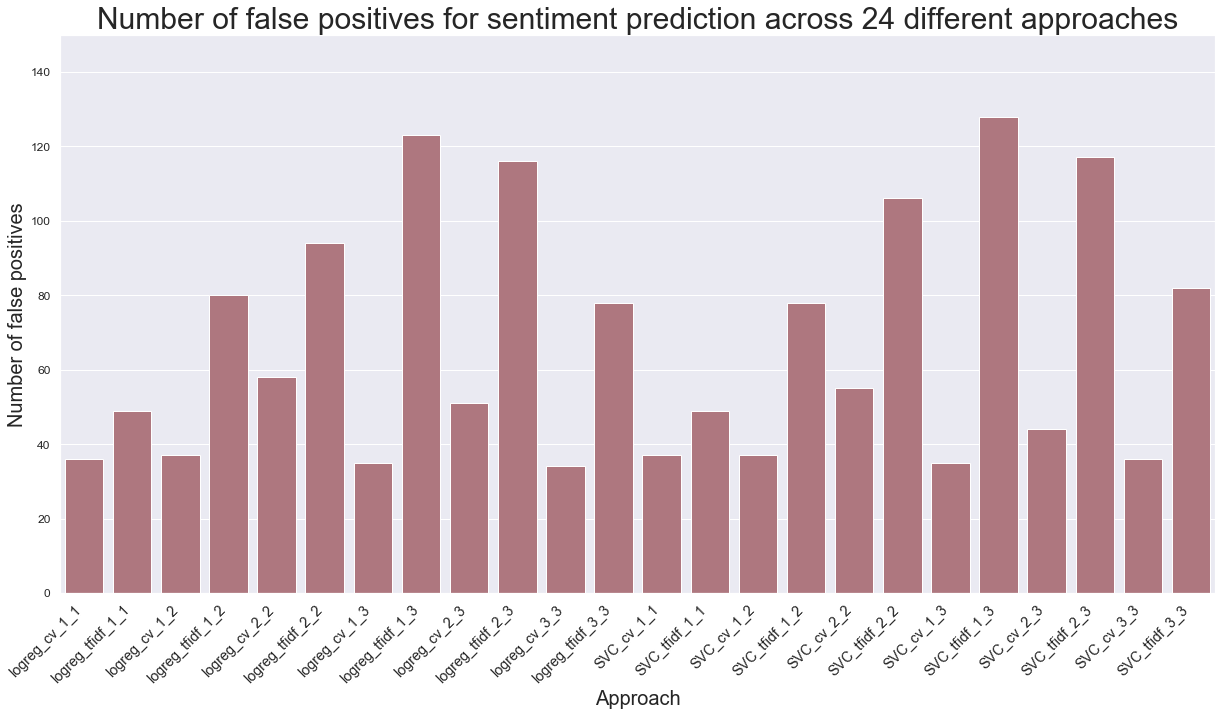

In [516]:
false_positives_chart = sns.barplot(x="Approach", y="False Positive", data=ls_results_df, color="#B76E79")
plt.ylim(0, 150)
false_positives_chart.axes.set_title("Number of false positives for sentiment prediction across 24 different approaches",fontsize=30)
false_positives_chart.set_xlabel("Approach",fontsize=20)
false_positives_chart.set_ylabel("Number of false positives",fontsize=20)
false_positives_chart.tick_params(labelsize=12)
false_positives_chart.set_xticklabels(false_positives_chart.get_xticklabels(),horizontalalignment='right',
    fontweight='light',
    fontsize='large',  rotation=45)

### Visualising Accuracy vs False Positives

<Figure size 9792x14832 with 0 Axes>

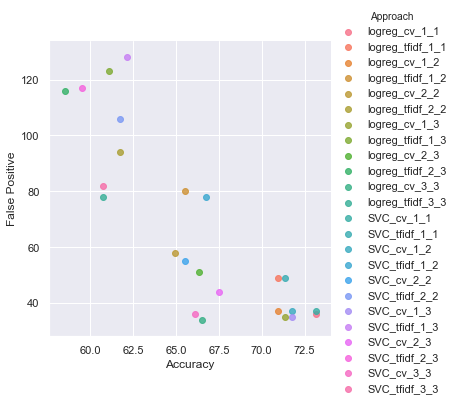

In [518]:
plt.figure(figsize=(136, 206))
accuracy_vs_falsepositives = sns.lmplot( x="Accuracy", y="False Positive", data=ls_results_df, fit_reg=False, hue='Approach', legend=True)
false_positives_chart.axes.set_title("Number of false positives within target identification across 10 different approaches",fontsize=30)
false_positives_chart.set_xlabel("Approach",fontsize=20)
false_positives_chart.set_ylabel("Number of false positives",fontsize=20)
false_positives_chart.tick_params(labelsize=12)